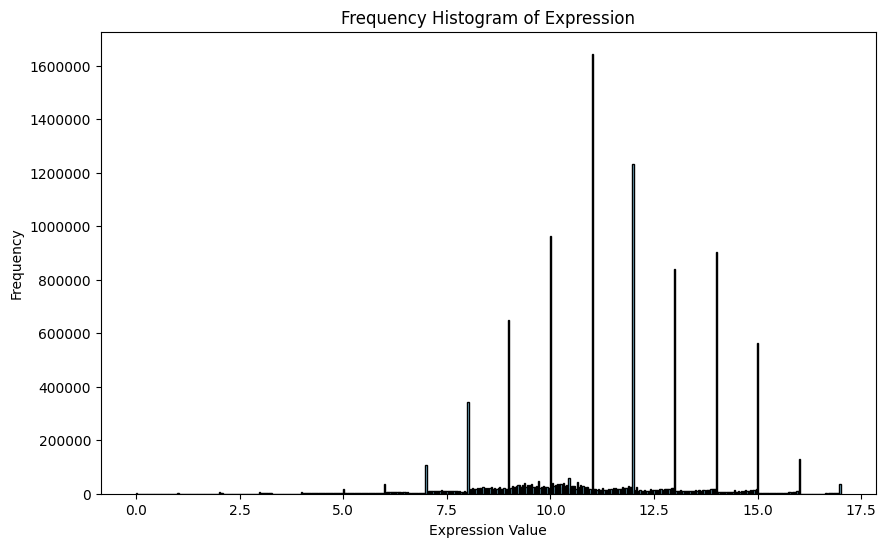

In [1]:
import polars as pl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Read the CSV file into a Polars DataFrame
df = pl.read_csv('dream_train.csv')

# Extract the 'expression' column as a NumPy array
expression_values = df['expression'].to_numpy()

# Create the histogram using Matplotlib
plt.figure(figsize=(10, 6))
plt.hist(expression_values, bins='auto', color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Expression Value')
plt.ylabel('Frequency')
plt.title('Frequency Histogram of Expression')

# Disable scientific notation on the y-axis
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.0f}'))

# Display the plot

plt.show()

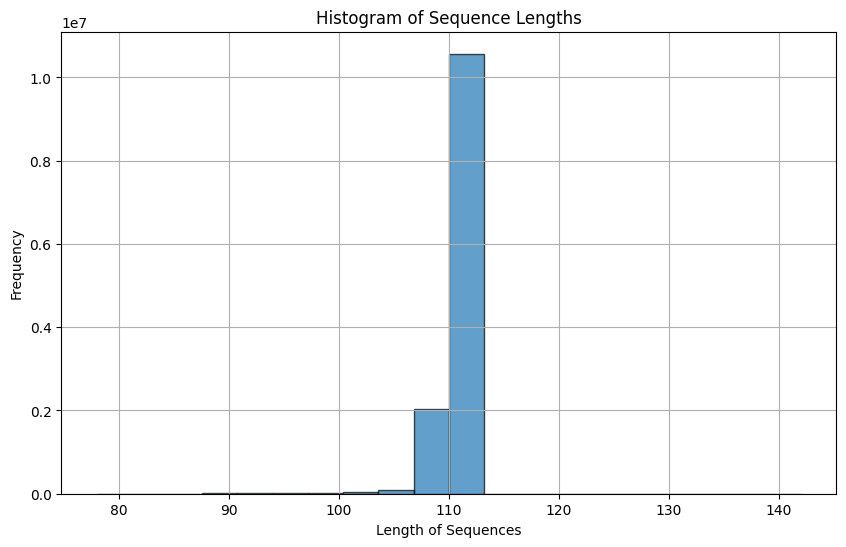

In [2]:
import polars as pl
import matplotlib.pyplot as plt

# Load data
df = pl.read_csv("dream_train.csv")

# 1. Histogram of sequence lengths
# Add sequence length column
df = df.with_columns(
    pl.col("sequence").str.len_bytes().alias("length")
)

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(df["length"].to_numpy().flatten(), bins=20, edgecolor='black', alpha=0.7)
plt.title("Histogram of Sequence Lengths")
plt.xlabel("Length of Sequences")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


In [3]:
# Get count of each sequence length category
length_counts = df["length"].value_counts()

max_size = length_counts["length"].sort()[-1]
max_size

142

In [ ]:
import polars as pl
import torch
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm

# Define valid nucleotide mappings
nucleotide_mapping = {'T': 0, 'G': 1, 'C': 2, 'A': 3}

class SequenceDataset(Dataset):
    def __init__(self, dataframe):
        self.dataframe = dataframe
        self.max_length = 142
        self.sequences = []
        self.expressions = []
        
        for row in tqdm(dataframe.iter_rows(named=True)):
            seq = row['sequence']
            expr = row['expression']
            
            one_hot = []
            # Process each character up to max_length
            for c in seq[:self.max_length]:
                if c in nucleotide_mapping:
                    vec = [0.0] * 4
                    vec[nucleotide_mapping[c]] = 1.0
                else:  # Handle 'N' or any invalid characters
                    vec = [0.0] * 4
                one_hot.append(vec)
            
            # Pad remaining slots with zero vectors
            while len(one_hot) < self.max_length:
                one_hot.append([0.0] * 4)
            
            # Convert to tensor and transpose to [4, 142]
            tensor_seq = torch.tensor(one_hot, dtype=torch.float32).permute(1, 0)
            self.sequences.append(tensor_seq)
            self.expressions.append(torch.tensor(expr, dtype=torch.float32))
    
    def __len__(self):
        return len(self.dataframe)
    
    def __getitem__(self, idx):
        return self.sequences[idx], self.expressions[idx]

dataset = SequenceDataset(df)


1055245it [01:19, 13495.55it/s]